In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
from os.path import isfile, join, basename, splitext
import datetime
import h5py

In [3]:
now = datetime.datetime.now()
timestamp = now.strftime("%Y%m%d_%H%M%S")

#this code creates a list with all the files that exist in a folder
traces_path = r"F:/histed/Traces/"
coords_path = r"F:/histed/Coordinates/"
df_path = r"F:/histed/df_over_f0/"
##tiff_path = r"Z:/smorou/Calcium Imaging/FV1/FV1 SPONT/FV1 SPONT_MMStack.ome.tif"
tiff_path = 'F:/histed/histed_21.1_test2_n2_200msSTIM/histed_21.1_test2_n2_200msSTIM/histed_21.1_test2_n2_200msSTIM_MMStack.ome.tif'

base_name = basename(tiff_path)
file_name_without_ext = splitext(base_name)[0]
print(f"Processing file: {file_name_without_ext}")

traces_list = [f for f in listdir(traces_path)]
coords_list = [f for f in listdir(coords_path) if isfile(join(coords_path,f))]
df_list = [f for f in listdir(df_path) if isfile(join(df_path,f))]

print(len(traces_list))

Processing file: histed_21.1_test2_n2_200msSTIM_MMStack.ome
1


In [5]:
traces, coords, dff = [], [], []

for i in range(len(traces_list)):
    file_path = join(traces_path, traces_list[i])
    temp_traces = pd.read_csv(file_path, encoding='utf-8', lineterminator='\n', on_bad_lines='skip')
    cells_list = list(temp_traces.keys())
    cells_list = cells_list[1:]
    temp = []
    for j in cells_list:
        temp.append(temp_traces[j])


    temp_coords = []
    file_path = join(coords_path, coords_list[i])
    temp_coordss = pd.read_csv(coords_path +'/' + coords_list[i], encoding='utf-8', lineterminator='\n', on_bad_lines='skip')
    temp_coords = temp_coordss.values.tolist()
    temp = [t.tolist() for t in temp]
    traces.append(temp)
    coords.append(temp_coords)

for i in range(len(df_list)):
    file_path = join(df_path, df_list[i])
    temp_df = pd.read_csv(file_path, encoding='utf-8', lineterminator='\n', on_bad_lines='skip')
    cells_list = list(temp_df.keys())
    cells_list = cells_list[:]
    temp = []
    for j in cells_list:
        temp.append(temp_df[j])


    temp_coords = []
    file_path = join(coords_path, coords_list[i])
    temp_coordss = pd.read_csv(coords_path +'/' + coords_list[i], encoding='utf-8', lineterminator='\n', on_bad_lines='skip')
    temp_coords = temp_coordss.values.tolist()
    temp = [t.tolist() for t in temp]
    dff.append(temp_df.values.tolist())

print(type(dff))
print(type(traces))
print(len(dff))
print(len(traces))
print(traces)

coordinates = np.asarray(coords)
data = np.asarray(traces).T
dff = np.asarray(dff).T

# Reshape to 2D by squeezing out the singleton dimension
dff_reshaped = np.squeeze(dff)  # Shape becomes (8, 29738)

# Transpose so that rows are time points and columns are ROIs
dff_reshaped = dff_reshaped.T  # Shape becomes (29738, 8)

# Define column names (e.g., ROI_1, ROI_2, ...)
df = pd.DataFrame(dff_reshaped, columns=cells_list)

print(df.head())

<class 'list'>
<class 'list'>
1
1
[[[106.07777777777778, 163.86666666666667, 222.7333333333333, 224.8, 225.22222222222223, 229.5, 230.44444444444449, 231.33333333333331, 230.24444444444444, 234.04444444444445, 228.7555555555556, 235.24444444444444, 232.92222222222225, 231.27777777777777, 239.0888888888889, 234.13333333333333, 232.84444444444443, 234.2888888888889, 235.7888888888889, 231.03333333333333, 231.35555555555555, 229.88888888888889, 230.2333333333333, 233.35555555555555, 227.7555555555556, 237.1888888888889, 222.7333333333333, 224.61111111111111, 227.61111111111111, 227.5222222222222, 226.2, 228.6555555555556, 231.64444444444445, 225.4333333333333, 232.7, 231.6888888888889, 228.51111111111112, 230.03333333333333, 230.3111111111111, 230.45555555555555, 225.3111111111111, 233.54444444444445, 228.33333333333331, 232.1888888888889, 229.9111111111111, 231.2111111111111, 225.22222222222223, 229.67777777777775, 227.88888888888889, 227.4777777777778, 229.26666666666668, 227.8888888888

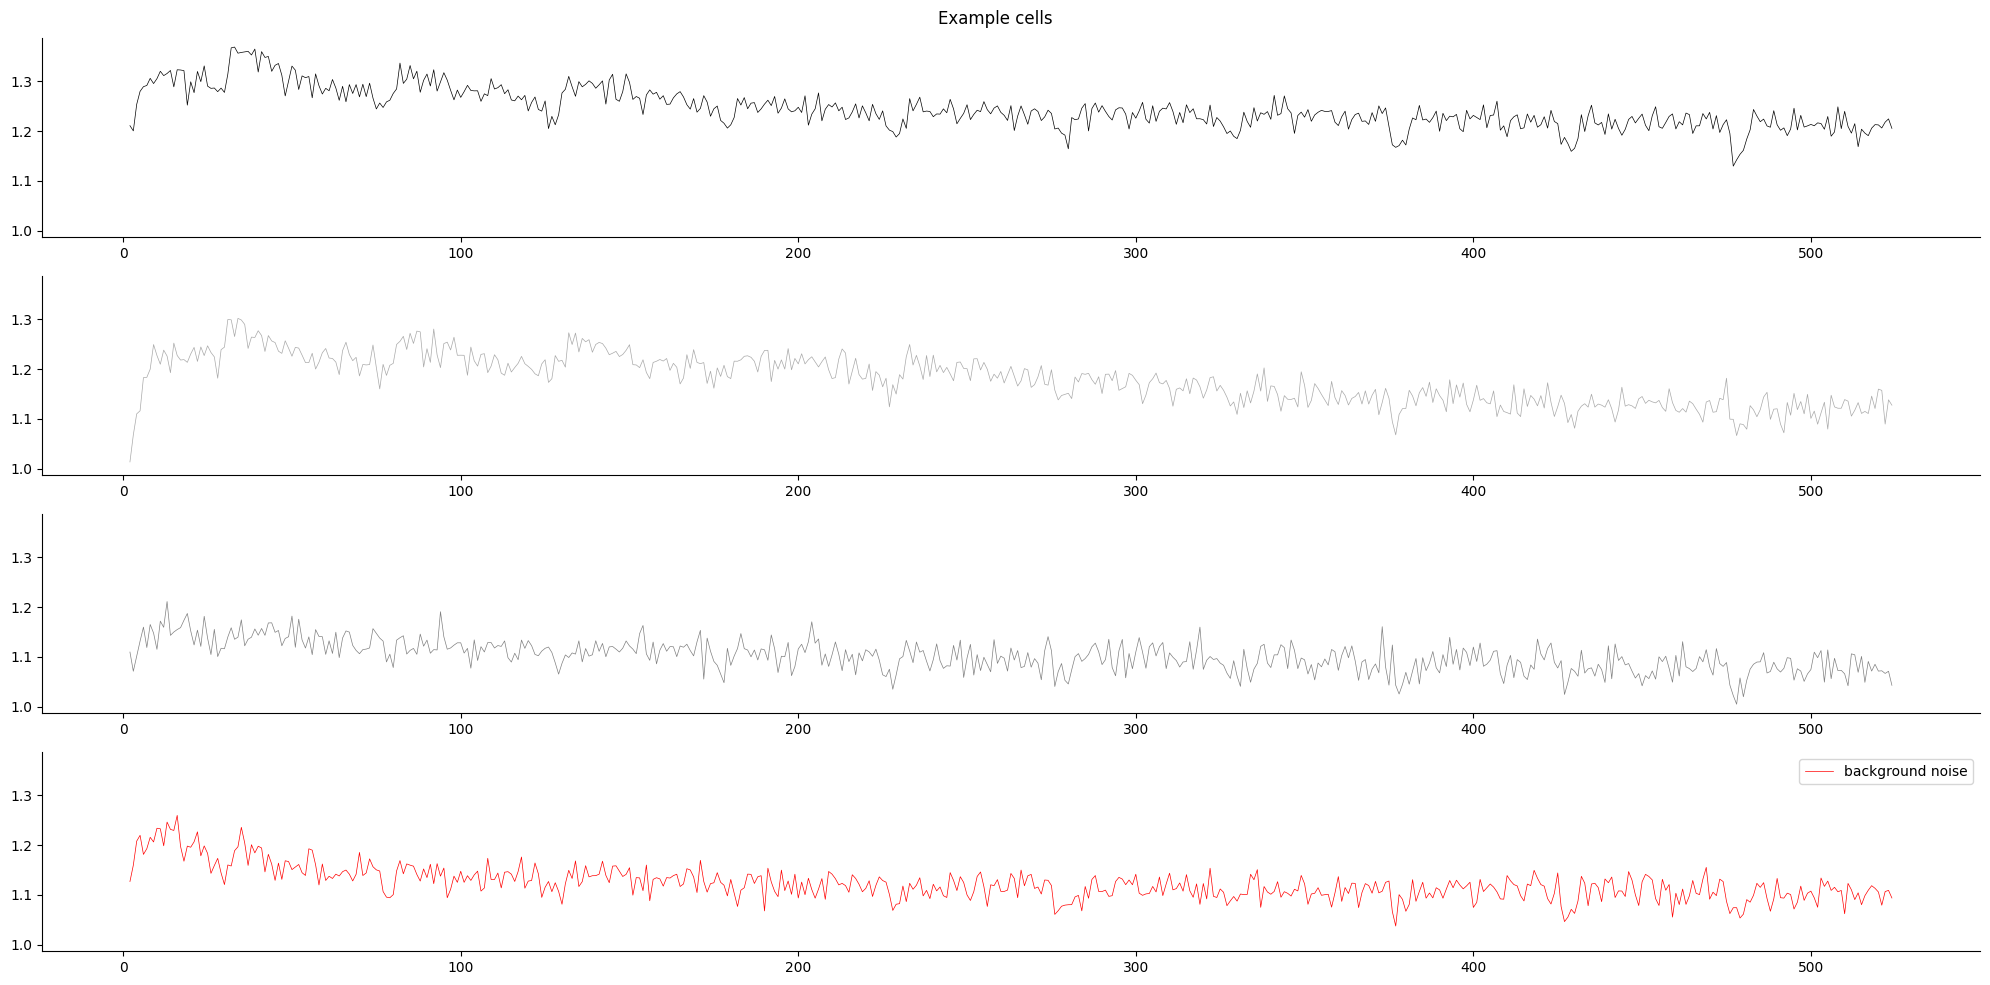

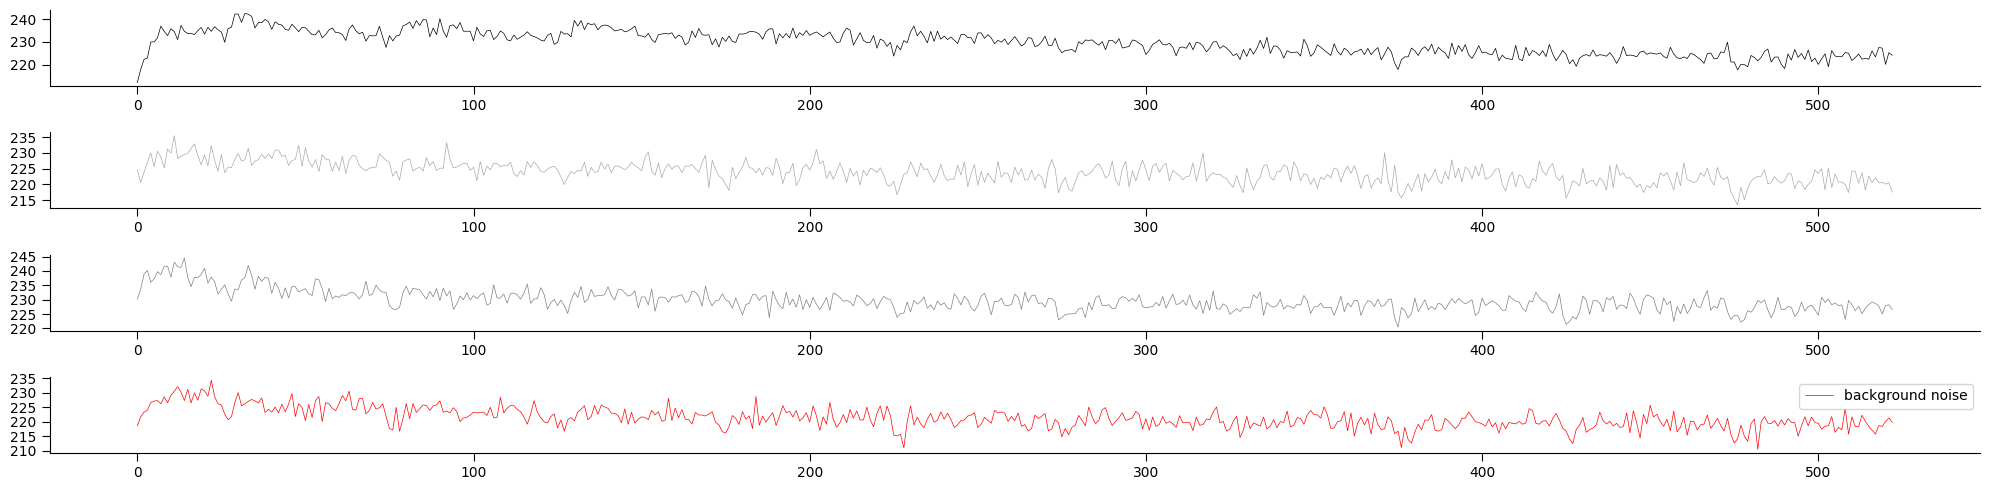

Saved plot to F:/histed/histed_21.1_test2_n2_200msSTIM_MMStack.ome20250128_122906_example_cells.pdf


<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(4, 1, sharey=True, figsize=(20, 10))
axs[0].plot(df.iloc[3:,2], color='black',  linewidth=0.5)
axs[1].plot(df.iloc[3:,3], color='darkgrey',  linewidth=0.5)
axs[2].plot(df.iloc[3:,4], color='grey', linewidth=0.5)
axs[3].plot(df.iloc[3:,5], color='red',  linewidth=0.5)
plt.legend(['background noise'], loc='upper right')


for ax in axs:
    ax.tick_params(axis='x')#, colors='white')
    ax.tick_params(axis='y')#, colors='white')
    # Remove the rectangle by hiding top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
fig.suptitle('Example cells')#, color='white')

plt.tight_layout()  # Adjust subplot spacing
plt.show()

fig, axs = plt.subplots(4, 1, sharey=False, figsize=(20, 5))

# Define data slices for each subplot
data_slices = [
    data[3:, 2],
    data[3:, 3],
    data[3:, 4],
    data[3:, 6]
]

# Plot each slice and remove the frame
colors = ['black', 'darkgrey', 'grey', 'red']  # Colors for each plot
for ax, slice_data, color in zip(axs, data_slices, colors):
    ax.plot(slice_data, color=color, linewidth=0.5)
    
    # Remove the rectangle by hiding top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Optionally, hide the bottom or left spines too if needed
    # ax.spines['left'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)

    # Adjust ticks for better spacing and visibility
    ax.tick_params(axis='both', direction='out', length=6)
    #ax.set_xlim(10, 5000)  # Keep the x-axis range tight

    # Add more ticks dynamically if needed
    ax.locator_params(axis='y', nbins=6)  # Increase y-axis tick density
    ax.locator_params(axis='x', nbins=10)  # Increase x-axis tick density

plt.legend(['background noise'], loc='upper right')

for ax in axs:
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')

file_name = f"F:/histed/{file_name_without_ext}{timestamp}.pdf"
additional_string = '_example_cells'

plt.tight_layout()  # Adjust subplot spacing
plt.show()

plt.savefig(f"{file_name.replace('.pdf', '')}{additional_string}.pdf", transparent=True)
print(f"Saved plot to {file_name.replace('.pdf', '')}{additional_string}.pdf")

#### PLOT RAW TRACES OF ALL CELLS 

C:\Users\LabPC\AppData\Local\Temp\ipykernel_20804\3931265805.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis', 10)  # 'viridis' with 10 colors


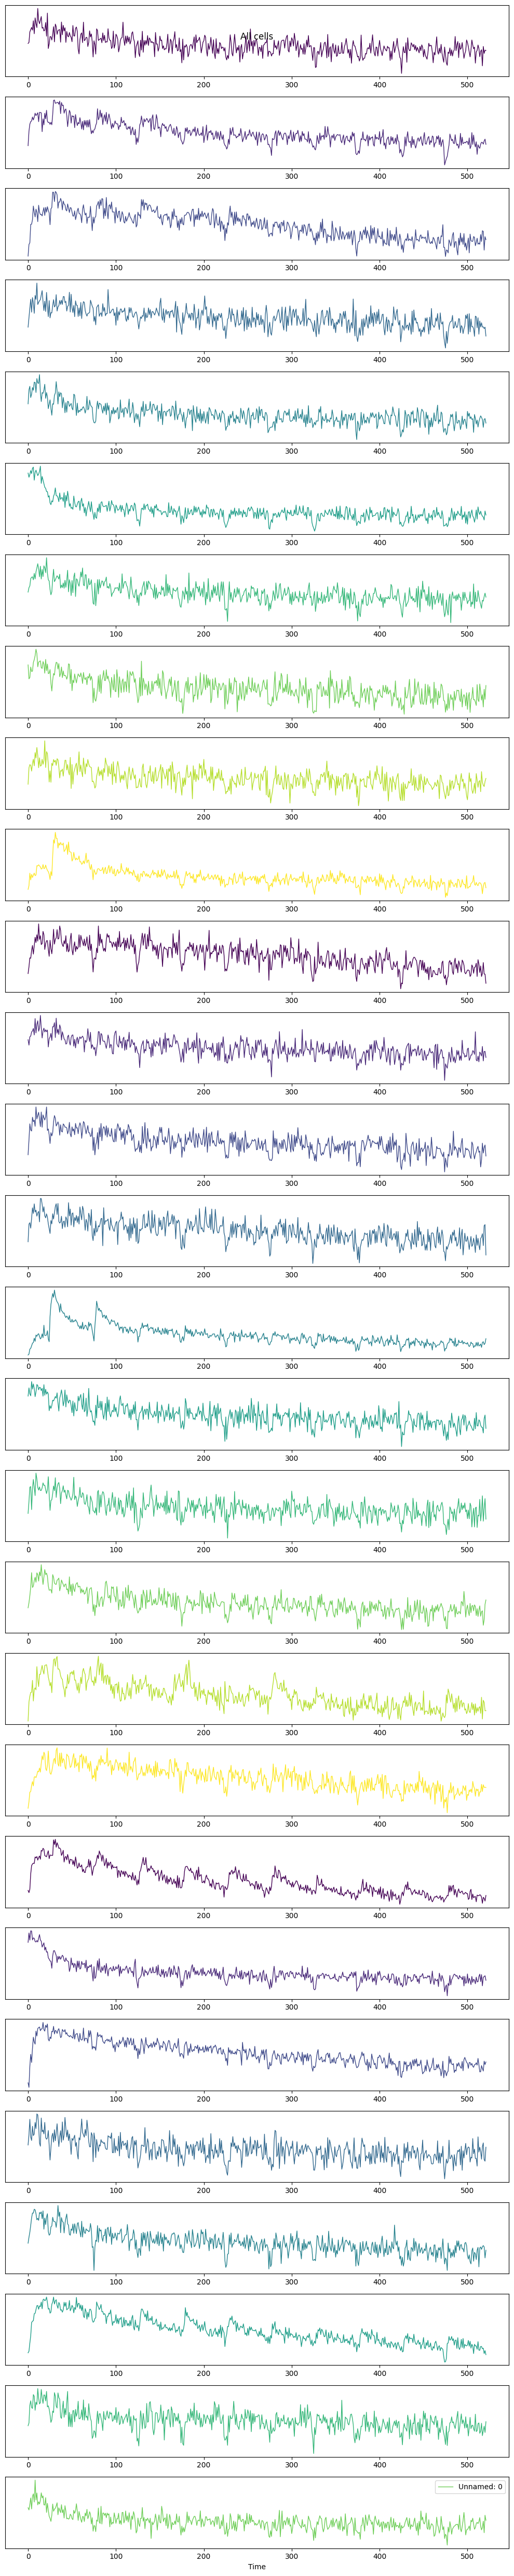

In [ ]:
import matplotlib.cm as cm
colormap = cm.get_cmap('viridis', 10)  # 'viridis' with 10 colors


plt.figure(figsize=(10, 50))

data = np.asarray(traces[0]).T

for i in range(0,len(data.T)):
    plt.subplot(len(data.T),1,i+1)
    plt.plot(data[3:,i], c=colormap(i % 10), linewidth=1)
    plt.yticks([])

plt.legend(cells_list, loc='upper right')

plt.tick_params(axis='x')#, colors='white')
plt.suptitle('All cells')#, color='white')
plt.xlabel('Time')#, color='white')
additional_string1 = '_all_cells'
plt.tight_layout()

#plt.savefig(f"{file_name.replace('.png', '')}{additional_string1}.png", transparent=True)

525
   Unnamed: 0    Cell_1    Cell_2    Cell_3    Cell_4    Cell_5    Cell_6  \
0         NaN  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1         inf  0.544778  0.658568  0.573779  0.577477  0.597352  0.807576   
2         inf  1.099717  1.211079  1.013717  1.109876  1.126999  1.540583   
3         inf  1.119200  1.200621  1.067989  1.071294  1.159761  1.539254   
4         inf  1.123180  1.253874  1.110233  1.102050  1.208100  1.518963   

     Cell_7    Cell_8    Cell_9  ...   Cell_19   Cell_20   Cell_21   Cell_22  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
1  0.552010  0.626036  0.573929  ...  0.480905  0.473514  0.503007  0.700995   
2  1.047111  1.158848  1.101702  ...  0.858453  0.809987  1.071889  1.397456   
3  1.075998  1.228482  1.099257  ...  0.875992  0.857034  1.107599  1.433309   
4  1.091269  1.190123  1.156171  ...  0.934456  0.875367  1.098077  1.478423   

    Cell_23   Cell_24   Cell_25   Cell_26   Cell_27 

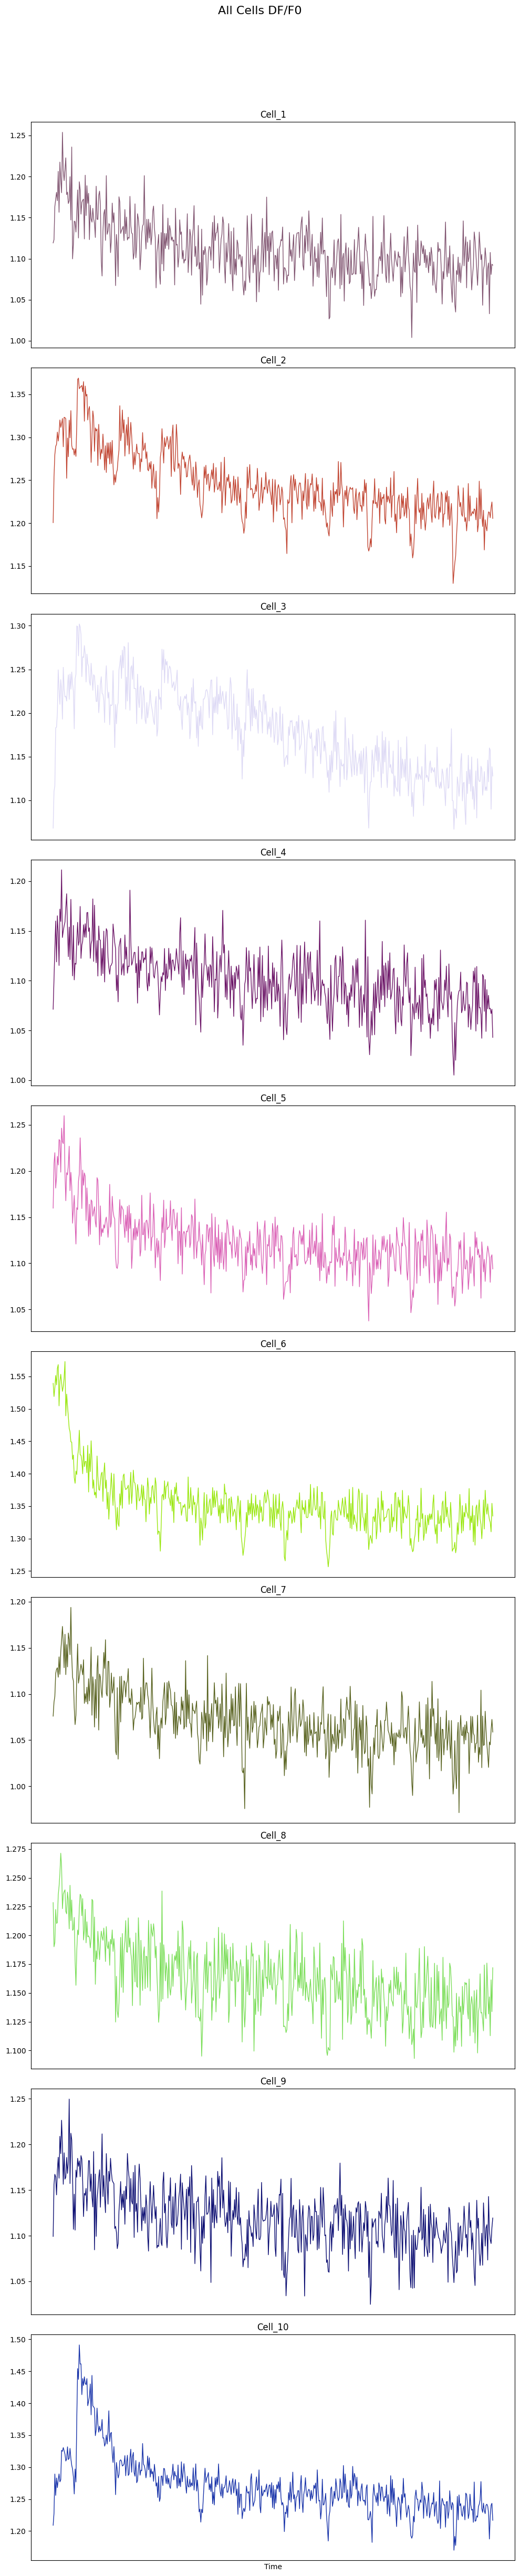

In [41]:
import numpy as np
import pandas as pd

# Reshape to 2D by squeezing out the singleton dimension
dff_reshaped1 = np.squeeze(dff)  # Shape becomes (8, 29738)

# Transpose so that rows are time points and columns are ROIs
dff_reshaped1 = dff_reshaped1.T  # Shape becomes (29738, 8)

# Define column names (e.g., ROI_1, ROI_2, ...)
df = pd.DataFrame(dff_reshaped1, columns=cells_list)
print(len(df))

print(df.head())

# Exclude "Unnamed: 0" column if it exists
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])
    
plt.figure(figsize=(10, 50))  # Adjust figure size
for i, roi in enumerate(df.columns[:10]):  # Limit to first 10 columns for clarity
    plt.subplot(10, 1, i + 1)
    plt.plot(df.iloc[3:,i], label=roi, c=(np.random.rand(3)), linewidth=1)
    #plt.yticks([])
    plt.title(roi)
    plt.xticks([])  # Hide x-axis ticks

plt.subplots_adjust(top=0.9)  # Adjust the top margin to make space for the suptitle
plt.suptitle("All Cells DF/F0", fontsize=16)  # Add a main title
plt.xlabel("Time")
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Prevent overlap with suptitle
plt.show()
#plt.savefig(f"{file_name.replace('.png', '')}{additional_string1}.png", transparent=True)

In [44]:
import matplotlib.pyplot as plt

# Exclude "Unnamed: 0" column if it exists
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

# Create a single figure
plt.figure(figsize=(12, 8))  # Adjust size for better visibility

# Plot all ROIs on the same axes
for roi in df.columns:
    plt.plot(df.iloc[3:, roi], label=roi, linewidth=1)

# Add legend, title, and labels
plt.title("All Cells DF/F0", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Signal", fontsize=14)
plt.legend(loc="upper right", fontsize=10)  # Show labels for all ROIs
plt.grid(True, alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()


ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

<Figure size 1200x800 with 0 Axes>

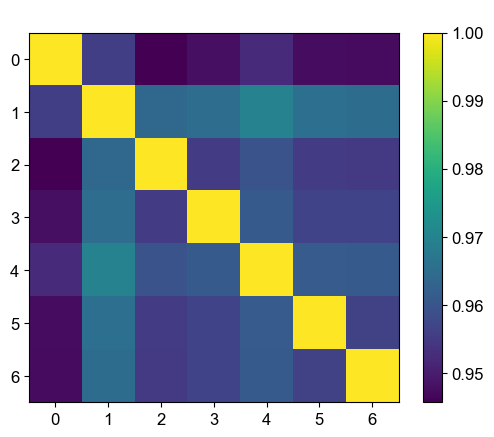

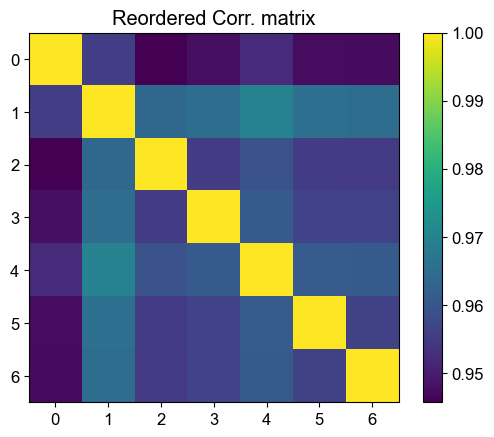

In [13]:
corr_values = np.empty( (len(data.T), len(data.T)) )

for i in range(len(data.T)):
    for j in range(0,len(data.T)):
        temp = np.corrcoef(data[:,i],data[:,j])
        corr_values[i,j] = temp[0,1]

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

plt.figure()
plt.imshow(corr_values)
plt.title('Correlation matrix',color='white')
plt.colorbar()
plt.tick_params(axis='x')#, colors='white')
plt.tick_params(axis='y')#, colors='white')
additional_string2 = '_corr_matrix'
#plt.savefig(f"{file_name.replace('.png', '')}{additional_string2}.png", transparent=True)

corr_index = np.empty((len(data.T)))
reordered_data = data[:, np.argsort(corr_index)]

for j in range(0, len(data.T)):
    temp = np.corrcoef(data[:,0],reordered_data[:,j])
    corr_index[j] = temp[0,1]

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

plt.figure()
plt.imshow(corr_values)
plt.title('Reordered Corr. matrix')
plt.colorbar()



In [14]:
plt.figure()

reordered_coords = coordinates[np.argsort(corr_index),:].astype(int)
reordered_data = data[:, np.argsort(corr_index)].T
print('reordered_data', reordered_data.shape)
print('reordered_coords', reordered_coords.shape)

#connection of cell activity, scatter and line 
for i in range(0,len(data.T)):
    plt.scatter(reordered_coords[i,1],reordered_coords[i,0])
plt.title('Cell positions', color='white')
plt.tick_params(axis='x')#, colors='white')
plt.tick_params(axis='y')#, colors='white')
additional_string3 = '_cell_positions'
plt.savefig(f"{file_name.replace('.png', '')}{additional_string3}.png", transparent=True)


IndexError: index 2 is out of bounds for axis 0 with size 1

<Figure size 640x480 with 0 Axes>

NameError: name 'reordered_coords' is not defined

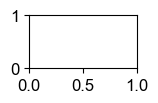

In [16]:
#graph for all vids
plt.figure()
all_correlations = []
for cell in range(len(traces)):
    coordinates = np.asarray(coords[cell]).astype(int)
    data = np.asarray(traces[cell]).T
    corr_values = np.empty((len(data.T), len(data.T)))

    for i in range(0,len(data.T)):
        for j in range(0,len(data.T)):
            temp = np.corrcoef(data[:,i], data[:,j])
            corr_values[i,j] = temp[0,1]

    ax = plt.subplot(6,4,cell+1)

    for i in range(0,len(data.T)):
        for j in range(0,len(data.T)):
            if corr_values[i,j]>0.9:
                plt.plot([reordered_coords[i,0], reordered_coords[j,1]], [reordered_coords[i,1], reordered_coords[j,1]], 'k', linewidth = temp[0,1])
    
    for i in range(0,len(data.T)):
        plt.scatter(coordinates[i,0],coordinates[i,1],s=35)

    all_correlations.append(corr_values)

plt.title(traces_list[cell])
ax.axis('off')